Data shape: (597, 14)
Columns: ['age_(age_in_year)', 'sex', 'chest_pain', 'blood_pressure', 'cholestoral', 'blood_sugar', 'electrocardiographic', 'heart_rate', 'exercise_induced', 'depression', 'slope', 'ca', 'thal', 'c']
Missing values: age_(age_in_year)         0
sex                       0
chest_pain                0
blood_pressure            1
cholestoral              23
blood_sugar               8
electrocardiographic      1
heart_rate                1
exercise_induced          1
depression                0
slope                   190
ca                      294
thal                    268
c                         0
dtype: int64
Model accuracy: 0.8235294117647058


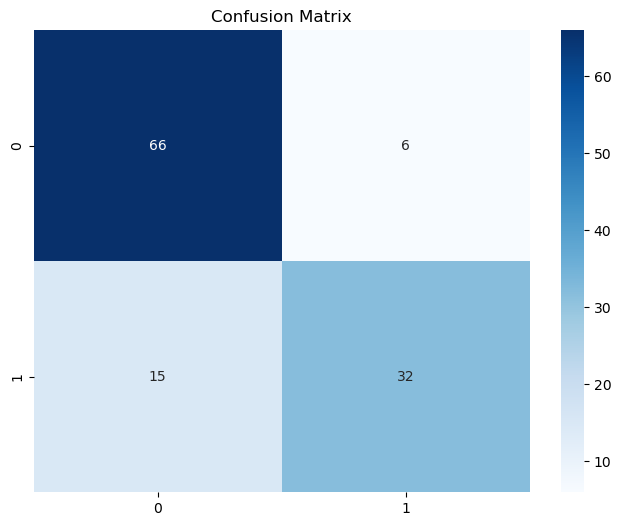

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("C:/Heart_data.csv") 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Data shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing values:", df.isnull().sum())

# Data Preparation
numeric_cols = ['age_(age_in_year)', 'blood_pressure', 'cholestoral', 'heart_rate', 'depression', 'ca', 'thal']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df = df[(df['blood_pressure'] > 0) & (df['cholestoral'] <= 500)]
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
categorical_cols = ['sex', 'chest_pain', 'blood_sugar', 'electrocardiographic', 'exercise_induced', 'slope']
df = pd.get_dummies(df, columns=categorical_cols)

# Modeling
X = df.drop('c', axis=1)
y = df['c']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

# Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()